## Rocket flight assignment

In [1]:
from __future__ import division, print_function
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import quad

We want to solve the equations for a rocket flight. The equations of motion for a rocket in purely vertical flight is given by
\begin{align*}
\frac{dh}{dt} =& v\\
(m_s + m_p) \frac{dv}{dt} =& -(m_s + m_p)g + \dot{m}_p v_e - \frac{1}{2}\rho v\vert v\vert A C_D
\end{align*}
where...

In [2]:
def mp(t, mp0):
    if t < 5.0:
        return mp0 - 20.0*t
    else:
        return 0.0

In [3]:
def dmp(t):
    if t < 5.0:
        return 20.0
    else:
        return 0.0

In [4]:
def iteration(x, t, dt, ms, mp0, ve, rho, A, CD):
    h, v = x
    m = ms + mp(t, mp0)
    h = h + dt*v
    v = v + dt*(ve*dmp(t)/m - 0.5*rho*v*np.abs(v)*A*CD/m - g)
    
    return h, v

In [5]:
ms = 50.0  # kg
g = 9.81  # m/s**2
rho = 1.091  # kg/m**3
r = 0.5  # m
A = np.pi*r**2  # m**2
ve = 325.0  # m/s
CD = 0.15
mp0 = 100.0
dt = 0.1
h0 = 0.0
v0 = 0.0

In [6]:
# Iteration
N = 500
X = np.zeros((2, N))
X[:, 0] = h0, v0
h = h0
v = v0
last_k = N
for k in range(1, N):
    # We should evaluate the rhs of the equation in the
    # previous timestep
    h, v = iteration([h, v], (k - 1)*dt, dt, ms, mp0, ve, rho, A, CD)
    X[:, k] = h, v
    if h < 0.0:
        last_k = k
        break
        

<IPython.core.display.Javascript object>


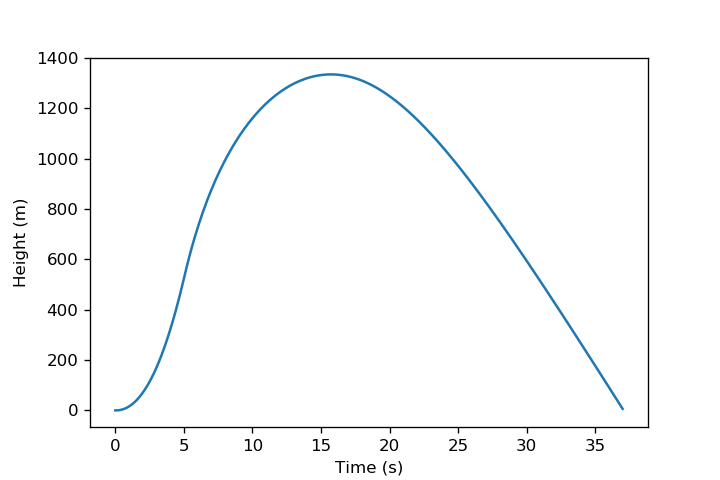

In [7]:
%matplotlib notebook
plt.figure(figsize=(6, 4))
plt.plot(dt*np.array(range(N))[:last_k], X[0,:last_k])
plt.xlabel("Time (s)")
plt.ylabel("Height (m)");

<IPython.core.display.Javascript object>


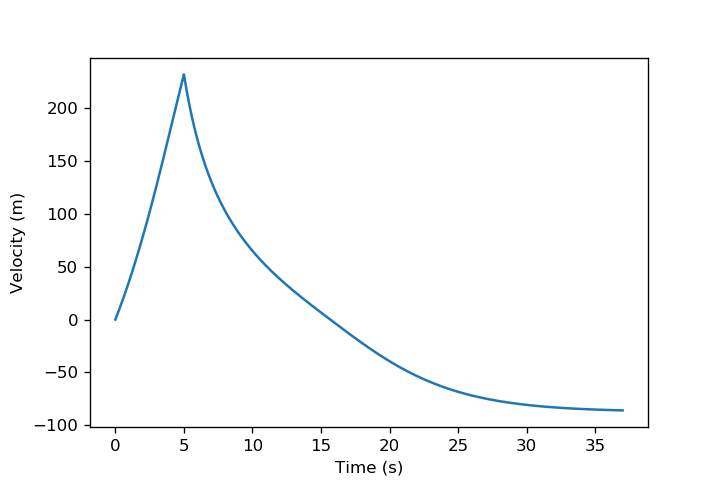

In [8]:
plt.figure(figsize=(6, 4))
plt.plot(dt*np.array(range(N))[:last_k], X[1,:last_k])
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m)");

At time $t=3.2$ s, what is the mass (in kg) of rocket propellant remaining

In [9]:
# Answer
# 100 - 20*3.2 = 36
mp(3.2, 100)

36.0

**Question:** What is the maximum speed?

In [10]:
round(np.max(X[1,:]), 2)

232.11

In [11]:
m = np.max(X[1,:])
k = [i for i, x in enumerate(X[1,:]) if np.isclose(x, m)][0]
np.round(k*dt, 2)

5.0

In [12]:
round(X[0, k], 2)

523.52

**Question:** What is the rocket's maximum altitude during flight (in meters)? (Answer to 2 decimal places):

In [13]:
round(np.max(X[0, :]), 2)

1334.18

In [14]:
m = np.max(X[0,:])
k = [i for i, x in enumerate(X[0,:]) if np.isclose(x, m)][0]
np.round(k*dt, 2)

15.7

**Question** At what time (in seconds) does the rocket impact the ground? (Answer to 2 decimal places)

In [15]:
round(dt*last_k,2)

37.1

In [16]:
round(X[1, last_k], 2)

-86.01